In [1]:
from pathlib import Path

import pandas as pd

from idf_analysis import IntensityDurationFrequencyAnalyse

In [2]:
location = 'graz'
grid_point_number = 5214

In [3]:
output_directory = Path(f'design_rain_ehyd_{grid_point_number}')
output_directory.mkdir(exist_ok=True)

In [4]:
fn_idf_ehyd = output_directory / 'design_rain_ehyd_5214.csv'
if fn_idf_ehyd.is_file():
    df = pd.read_csv(fn_idf_ehyd, index_col=[0,1])
    df = df.rename(columns=int)
    df = df.rename(index=int, level=0)
else:
    from ehyd_tools.design_rainfall import get_max_calculation_method, get_ehyd_design_rainfall_offline
    df = get_ehyd_design_rainfall_offline(grid_point_number, pth='')
    # idf_table = get_max_calculation_method(df)
df

1      2      3      5      10     20     25   \
duration calculation method                                                   
5        MaxModN              8.8   10.4   11.7   13.4   15.8   18.2   18.9   
         Bemessung            8.6   10.2   11.3   12.7   14.7   16.7   17.4   
         ÖKOSTRA              8.4    9.9   10.8   11.9   13.4   14.9   15.5   
10       MaxModN             14.0   16.6   18.2   20.2   24.7   29.1   30.5   
         Bemessung           13.7   16.3   17.8   19.7   23.3   26.8   27.8   
...                           ...    ...    ...    ...    ...    ...    ...   
7200     Bemessung           84.7  106.4  119.6  136.1  159.0  181.4  189.1   
         ÖKOSTRA             78.3   93.6  102.2  112.9  128.3  142.7  148.2   
8640     MaxModN             96.4  123.1  141.3  164.3  195.4  226.6  236.6   
         Bemessung           89.6  110.8  124.4  141.8  164.9  188.6  195.9   
         ÖKOSTRA             82.8   98.4  107.4  119.2  134.4  150.6  155.2   

                               30     50     75     100  
duration calculation method                              
5        MaxModN              19.6   21.3   22.7   23.7  
         Bemessung            18.0   19.4   20.6   21.4  
         ÖKOSTRA              15.9   17.0   17.9   18.5  
10       MaxModN              31.7   35.0   37.6   39.4  
         Bemessung            28.8   31.4   33.5   35.0  
...                            ...    ...    ...    ...  
7200     Bemessung           194.7  211.6  224.8  233.8  
         ÖKOSTRA             151.6  162.9  171.5  177.0  
8640     MaxModN             244.9  267.8  286.1  299.0  
         Bemessung           201.9  219.2  232.9  242.9  
         ÖKOSTRA             158.8  170.6  179.6  186.8  

[63 rows x 11 columns]

In [5]:
idf_table = df.xs('ÖKOSTRA', axis=0, level='calculation method', drop_level=True)
idf_table

,1,2,3,5,10,20,25,30,50,75,100
duration,,,,,,,,,,,
5,8.4,9.9,10.8,11.9,13.4,14.9,15.5,15.9,17.0,17.9,18.5
10,13.4,15.9,17.3,19.2,21.7,24.3,24.9,25.6,27.5,29.1,30.1
15,16.8,20.0,21.9,24.3,27.6,30.7,31.8,32.7,35.0,37.0,38.4
20,19.3,23.1,25.3,28.2,31.9,35.8,36.9,37.9,40.8,43.0,44.6
30,22.7,27.3,30.0,33.5,38.1,42.7,44.3,45.5,48.8,51.5,53.4
45,25.8,31.3,34.5,38.4,44.0,49.4,51.2,52.7,56.6,59.7,62.0
60,27.7,33.6,37.1,41.5,47.5,53.2,55.3,56.8,61.0,64.4,66.9
90,29.9,36.4,40.2,45.0,51.3,57.8,60.0,61.7,66.2,70.2,72.9
120,31.2,38.0,41.8,46.8,53.6,60.3,62.5,64.3,69.4,73.6,76.3


In [6]:
idf_reverse = IntensityDurationFrequencyAnalyse.from_idf_table(idf_table, linear_interpolation=True)

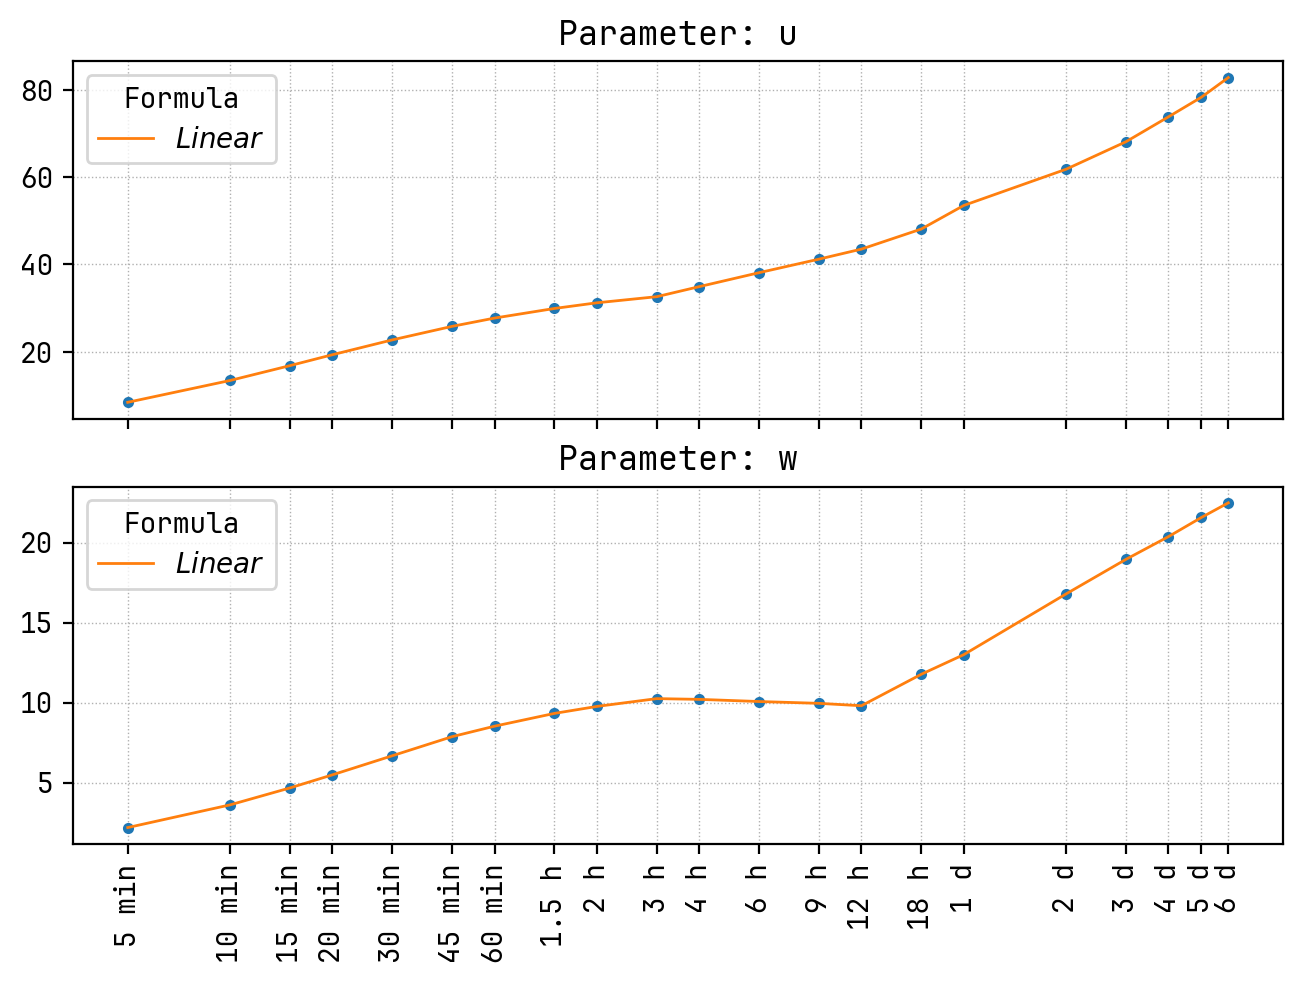

In [7]:
fig = idf_reverse.parameters.interim_plot_parameters()

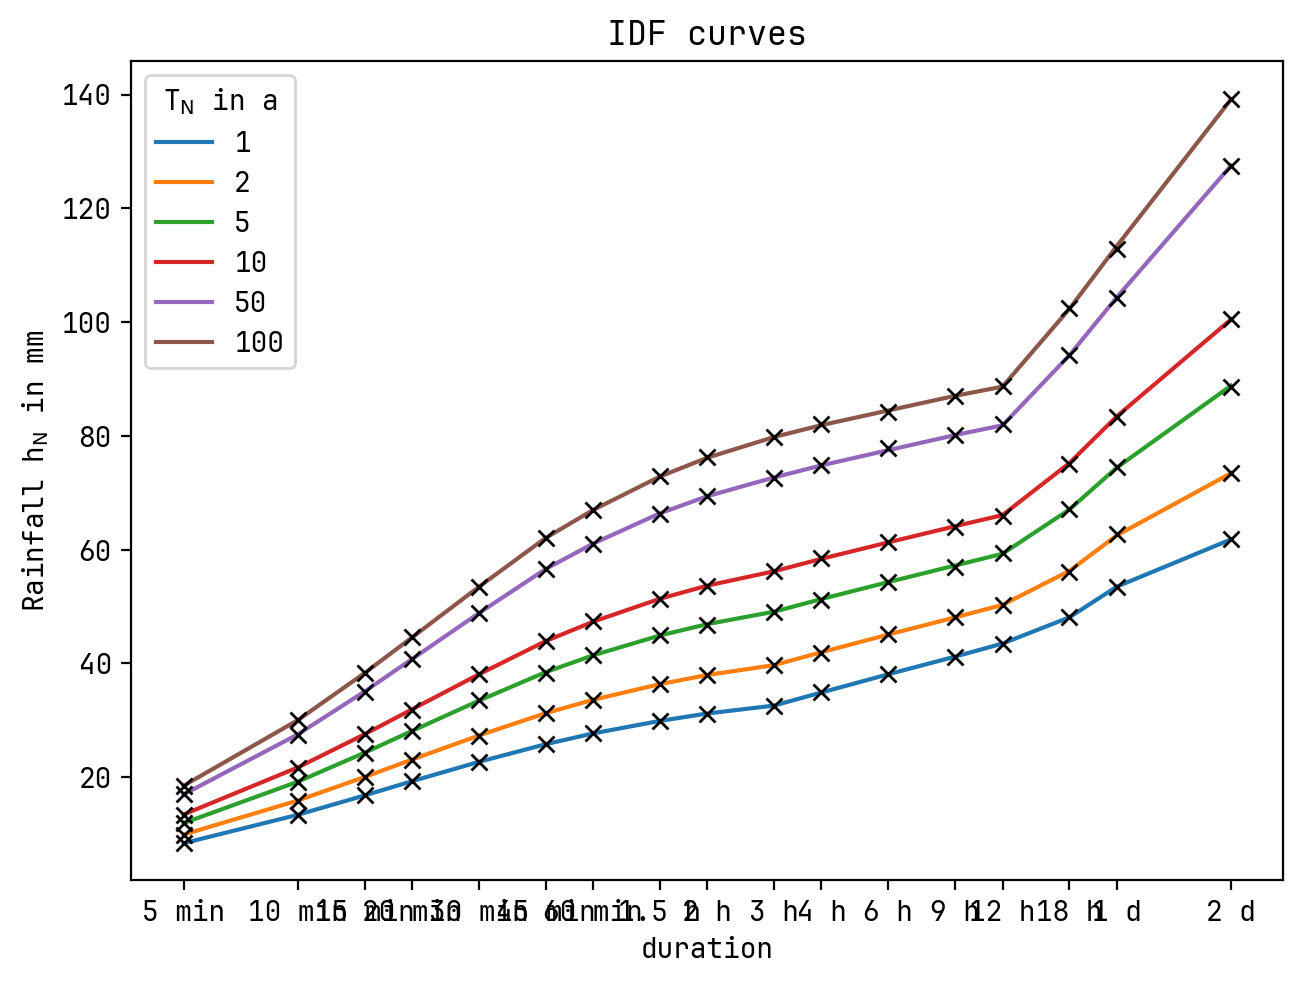

In [8]:
max_duration = 2880
fig, ax = idf_reverse.curve_figure(color=True, logx=True, max_duration=max_duration, duration_steps_ticks=True)

ax = idf_table.loc[:max_duration, [1, 2, 5, 10, 50, 100]].plot(ax=ax, marker='x', lw=0, color='black', legend=False)

In [9]:
idf_reverse = IntensityDurationFrequencyAnalyse.from_idf_table(idf_table, linear_interpolation=False)

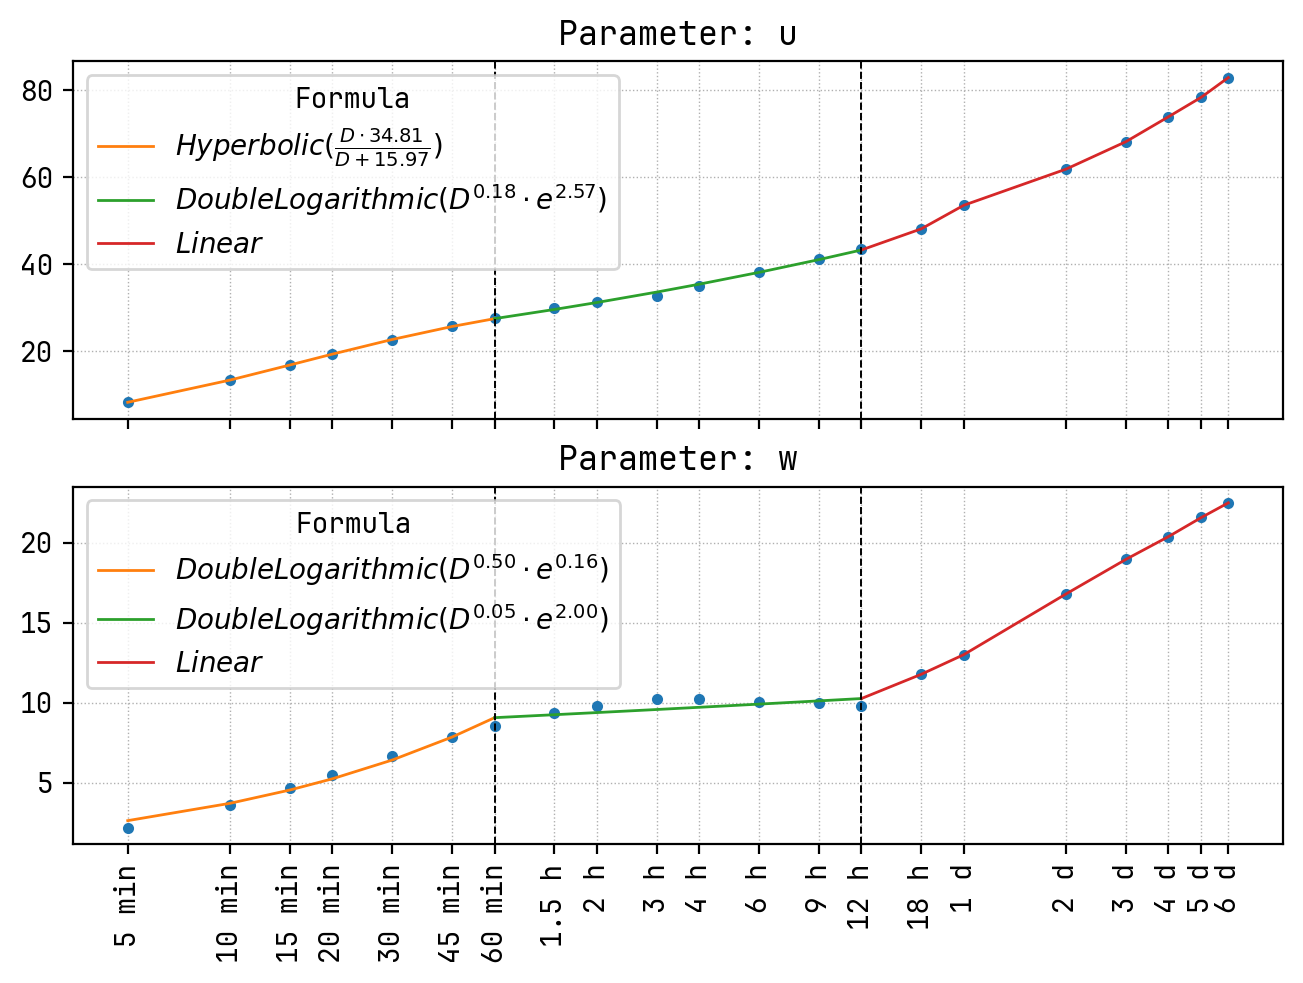

In [10]:
fig = idf_reverse.parameters.interim_plot_parameters()

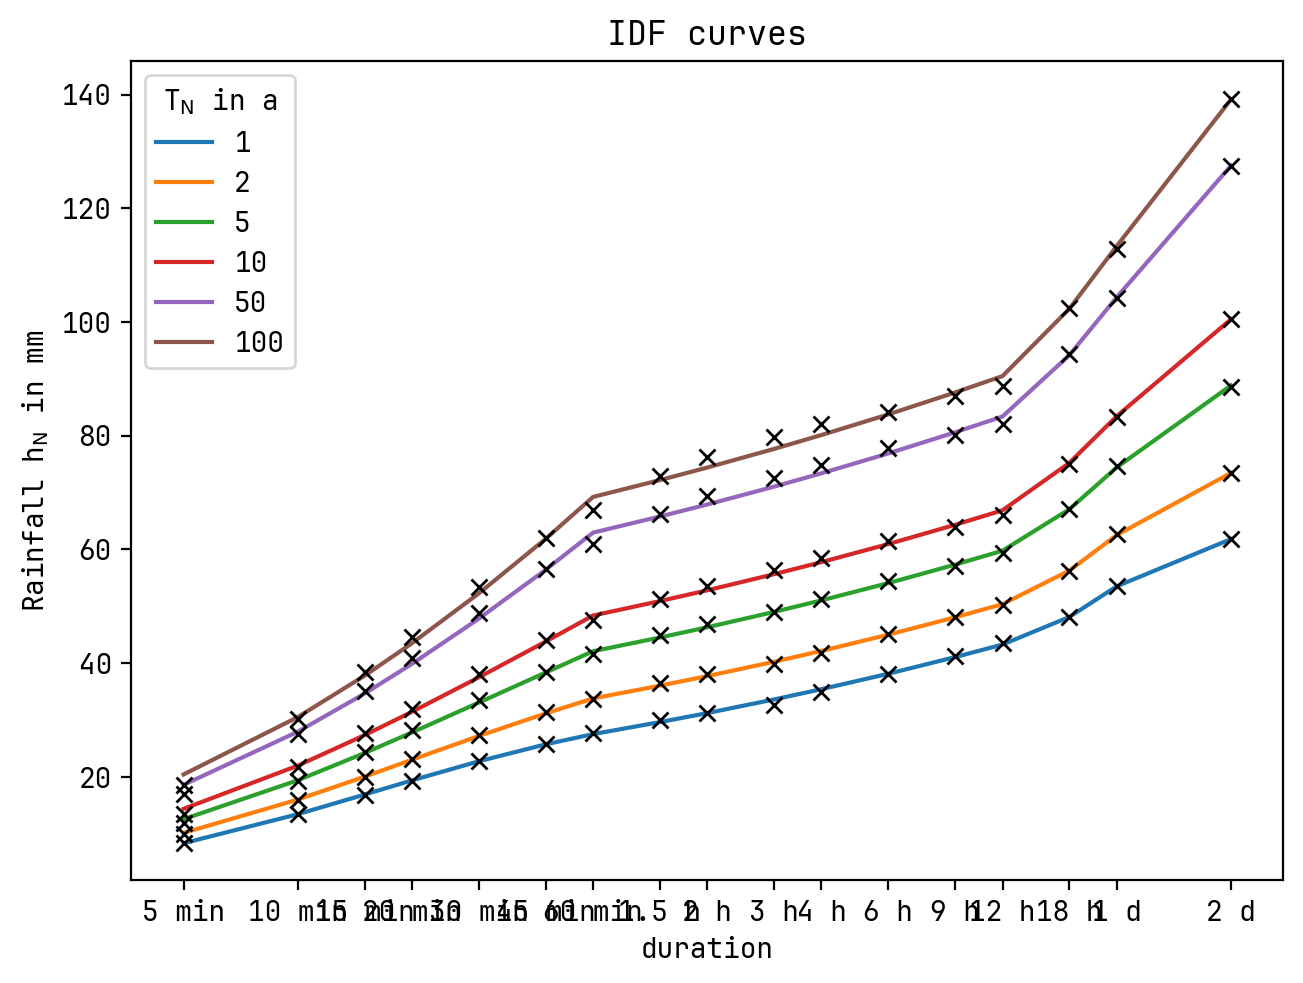

In [11]:
max_duration = 2880
fig, ax = idf_reverse.curve_figure(color=True, logx=True, max_duration=max_duration, duration_steps_ticks=True)

ax = idf_table.loc[:max_duration, [1, 2, 5, 10, 50, 100]].plot(ax=ax, marker='x', lw=0, color='black', legend=False)